In [6]:
print ("welcome to the green finance analysis")

welcome to the green finance analysis


In [ ]:
# Analisis Financial Dataset - Query 1

In [24]:
import pandas as pd

# --- 1. Baca file CSV dan karena tabel saya tidak terbaca karena titik koma yang berantakan maka saya beri formulasi ini
df = pd.read_csv("C:/Users/LENOVO/A10037DB2025/Green-Finance/Financial_Dataset.csv")
print(df.columns.tolist())
df.columns = df.columns.str.strip()              # hapus spasi
df.columns = df.columns.str.replace('\ufeff', '')  
df = pd.read_csv("Financial_Dataset.csv", 
                 delimiter=';', 
                 encoding='utf-8-sig',
                 converters={
                     'Investment_Cost': lambda x: float(x.replace(',', '.')),
                     'Revenue_Stream': lambda x: float(x.replace(',', '.')),
                     'Debt_Ratio': lambda x: float(x.replace(',', '.')),
                     'Payment_Delay': lambda x: float(x.replace(',', '.'))
                 })

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\ufeff', '')
               
# --- 2. Parameter tetap ---
DISKONTO = 0.05           # 5%
UMUR_PROYEK = 10          # 10 tahun
ENV_PLTS = 1.2            # 1.2 miliar rupiah per tahun
ENV_PLTM = 0.8            # 0.8 miliar rupiah per tahun

# --- 3. Fungsi GNPV ---
def hitung_gnpv(cf_tahunan, env_tahunan, investasi_awal, diskonto=DISKONTO, umur=UMUR_PROYEK):
    return sum((cf_tahunan + env_tahunan) / ((1 + diskonto) ** t) for t in range(1, umur + 1)) - investasi_awal

# --- 4. Hitung GNPV per proyek ---
gnpv_list = []
for idx, row in df.iterrows():
    jenis = row['Project_ID'].split('-')[0]  # PLTS atau PLTM
    env_t = ENV_PLTS if jenis == 'PLTS' else ENV_PLTM

    cf = row['Revenue_Stream']     # dalam miliar
    i = row['Investment_Cost']     # dalam miliar

    gnpv = hitung_gnpv(cf, env_t, i)
    gnpv_list.append(gnpv)

# --- 5. Tambahkan ke DataFrame ---
df['GNPV (Miliar Rp)'] = gnpv_list

# --- 6. Tampilkan atau simpan hasil ---
print(df[['Project_ID', 'Investment_Cost', 'Revenue_Stream', 'GNPV (Miliar Rp)']])

['Project_ID;Investment_Cost;Revenue_Stream;Debt_Ratio;Payment_Delay;Konteks_Proyek;Status_Rank']
       Project_ID  Investment_Cost  Revenue_Stream  GNPV (Miliar Rp)
0    PLTS-NTT-001           150.00            12.5        -44.212231
1  PLTM-SUMUT-001            80.00             6.8        -21.314815
2  PLTS-JATIM-001           200.23            18.0        -51.972689
3   PLTM-KALB-001            90.00             7.2        -28.226121
4   PLTS-SULS-001           125.50            10.0        -39.016569
5   PLTM-PAPU-001           100.00             8.0        -32.048733
6    PLTS-NTB-001           180.00            15.0        -54.907894
7   PLTM-ACHD-001            85.00             6.5        -28.631335
8   PLTS-JABW-001           220.00            20.0        -56.299220
9   PLTM-SULU-001            95.00             7.5        -30.909600


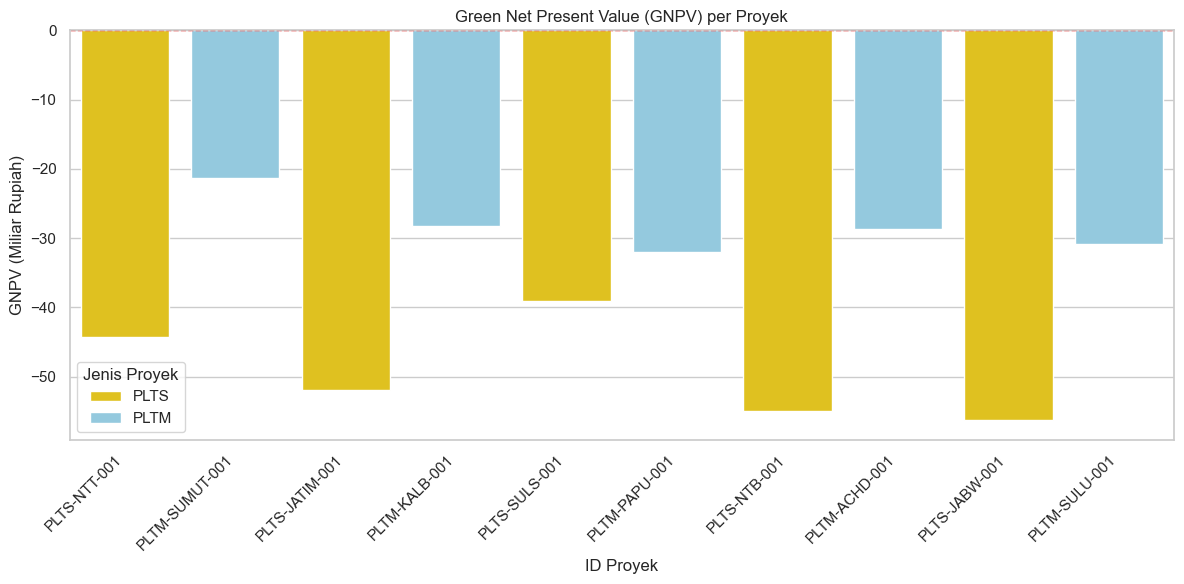

In [25]:
#Visualisasi GNPV Per proyek
import matplotlib.pyplot as plt
import seaborn as sns

df['Jenis'] = df['Project_ID'].str.split('-').str[0]

# --- Visualisasi GNPV ---
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Project_ID',
    y='GNPV (Miliar Rp)',
    hue='Jenis',
    data=df,
    palette={'PLTS': 'gold', 'PLTM': 'skyblue'}
)

plt.title('Green Net Present Value (GNPV) per Proyek')
plt.ylabel('GNPV (Miliar Rupiah)')
plt.xlabel('ID Proyek')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='red', linestyle='--', linewidth=1) 
plt.tight_layout()
plt.legend(title='Jenis Proyek')
plt.show()


In [13]:
# Analisis Enviromental Dataset - Query 2

print("Kita lanjut ke Analisis Enviromental Dataset")

Kita lanjut ke Analisis Enviromental Dataset


In [26]:
import os
print(os.listdir("C:/Users/LENOVO/A10037DB2025/Green-Finance"))

['analisis-green-finance.ipynb', 'Economic_Dataset.csv', 'Environmental_Dataset.csv', 'Financial_Dataset.csv', 'Geospatial_Dataset.csv', 'Social_Dataset.csv']


In [30]:
import pandas as pd

# Membaca dua file
#Membaca file env_df untuk mengambil data CO2 reduction, Energy_Output
#Membaca fin_df untuk mengambil data berisi Project_ID dan Investment_Amount

env_df = pd.read_csv("C:/Users/LENOVO/A10037DB2025/Green-Finance/Environmental_Dataset.csv", delimiter=";")
fin_df = pd.read_csv("C:/Users/LENOVO/A10037DB2025/Green-Finance/Financial_Dataset.csv", delimiter=";")

env_df.columns = env_df.columns.str.strip()
fin_df.columns = fin_df.columns.str.strip()
fin_df["Investment_Cost"] = fin_df["Investment_Cost"].astype(str).str.replace(",", ".").astype(float)

merged_df = pd.merge(env_df, fin_df[["Project_ID", "Investment_Cost"]], on="Project_ID", how="left")

# Parameter CROI
harga_karbon = 100_000     
umur_proyek = 10           

merged_df["CROI"] = (merged_df["CO2_Reduction"] * harga_karbon * umur_proyek) / merged_df["Investment_Cost"]

print(merged_df[["Project_ID", "CO2_Reduction", "Investment_Cost", "CROI"]])


       Project_ID  CO2_Reduction  Investment_Cost          CROI
0    PLTS-NTT-001          75000           150.00  5.000000e+08
1  PLTM-SUMUT-001          30000            80.00  3.750000e+08
2  PLTS-JATIM-001          90000           200.23  4.494831e+08
3   PLTM-KALB-001          35000            90.00  3.888889e+08
4   PLTS-SULS-001          60000           125.50  4.780876e+08
5   PLTM-PAPU-001          40000           100.00  4.000000e+08
6    PLTS-NTB-001          80000           180.00  4.444444e+08
7   PLTM-ACHD-001          32000            85.00  3.764706e+08
8   PLTS-JABW-001          95000           220.00  4.318182e+08
9   PLTM-SULU-001          36000            95.00  3.789474e+08


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12168\1495814289.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


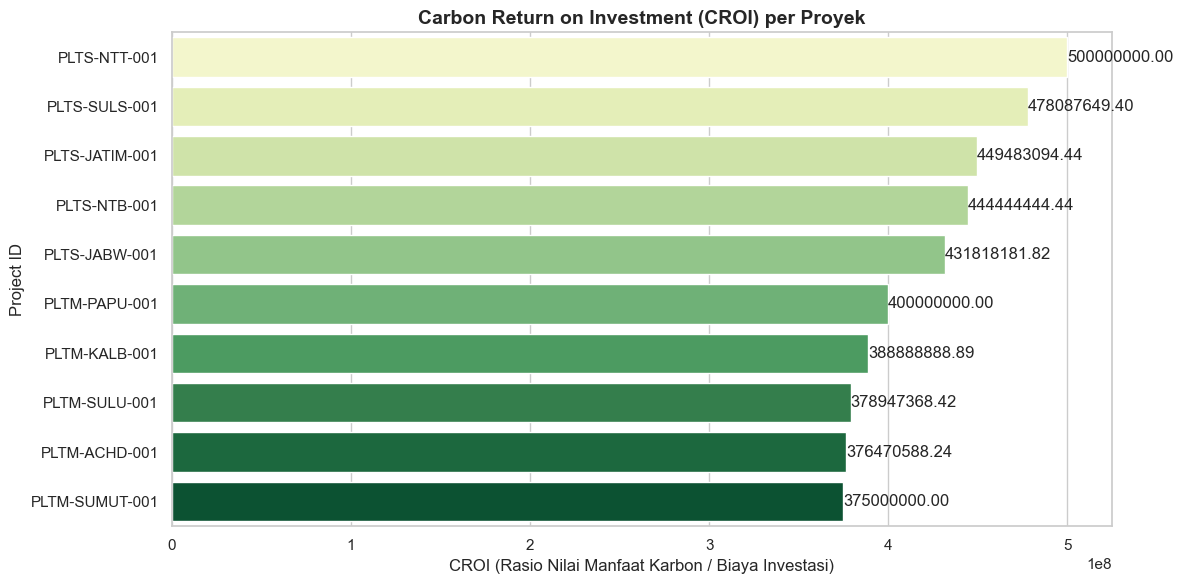

In [ ]:
#Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

merged_df_sorted = merged_df.sort_values("CROI", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=merged_df_sorted,
    x="CROI",
    y="Project_ID",
    palette="YlGn"
)

plt.title("Carbon Return on Investment (CROI) per Proyek", fontsize=14, weight='bold')
plt.xlabel("CROI (Rasio Nilai Manfaat Karbon / Biaya Investasi)", fontsize=12)
plt.ylabel("Project ID", fontsize=12)
for index, value in enumerate(merged_df_sorted["CROI"]):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.show()


In [26]:
#Query 3 - Analisis Social Dataset
print("Selanjutnya adalah analisis social dataset")

Selanjutnya adalah analisis social dataset


Kolom df_soc: ['Project_ID', 'Land_Status', 'Community_Support', 'Population_Density', 'Konteks_Sosial', 'Tingkat_Konflik']
Kolom df_fin: ['Project_ID', 'Investment_Cost', 'Revenue_Stream', 'Debt_Ratio', 'Payment_Delay', 'Konteks_Proyek', 'Status_Rank']

✅ Hasil Perhitungan SROI:
       Project_ID  Investment_Cost_Rp  Jobs_Created   Social_NPV      SROI  \
0    PLTS-NTT-001        1.500000e+11            40  24000000000  0.160000   
1  PLTM-SUMUT-001        8.000000e+10            55  33000000000  0.412500   
2  PLTS-JATIM-001        2.002300e+11            40  24000000000  0.119862   
3   PLTM-KALB-001        9.000000e+10            55  33000000000  0.366667   
4   PLTS-SULS-001        1.255000e+11            40  24000000000  0.191235   
5   PLTM-PAPU-001        1.000000e+11            55  33000000000  0.330000   
6    PLTS-NTB-001        1.800000e+11            40  24000000000  0.133333   
7   PLTM-ACHD-001        8.500000e+10            55  33000000000  0.388235   
8   PLTS-JABW-001

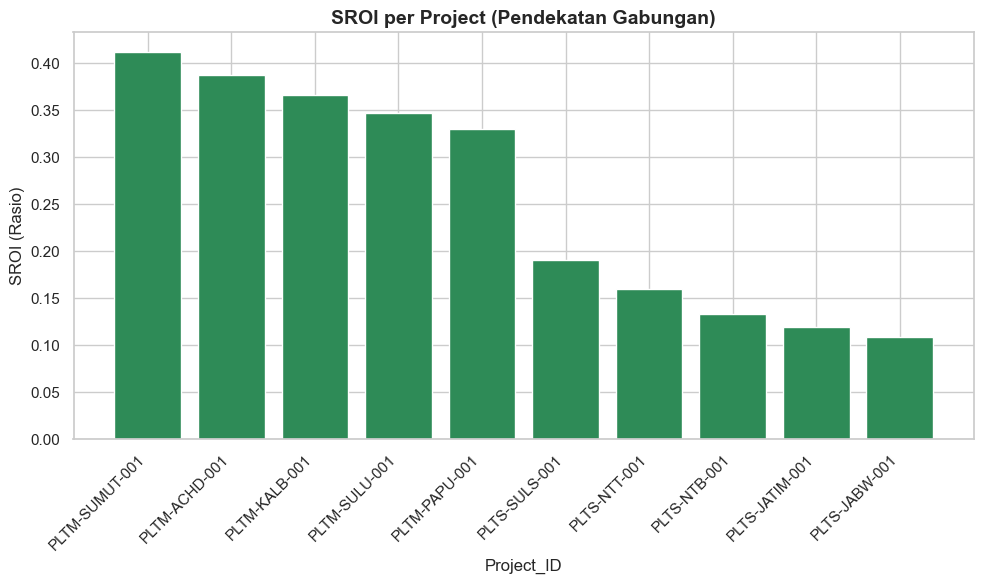


📊 Grafik berhasil disimpan: sroi_combined_chart.png


In [10]:
# === 1. Import Library ===
import pandas as pd
import matplotlib.pyplot as plt

# === 2. Baca CSV dengan delimiter titik koma ===
soc_path = "C:/Users/LENOVO/A10037DB2025/Green-Finance/Social_Dataset.csv"
fin_path = "C:/Users/LENOVO/A10037DB2025/Green-Finance/Financial_Dataset.csv"

df_soc = pd.read_csv(soc_path, sep=";", encoding="utf-8-sig")
df_fin = pd.read_csv(fin_path, sep=";", encoding="utf-8-sig")

# === 3. Cek nama kolom (opsional) ===
print("Kolom df_soc:", df_soc.columns.tolist())
print("Kolom df_fin:", df_fin.columns.tolist())

# === 4. Standarisasi isi Project_ID ===
df_soc['Project_ID'] = df_soc['Project_ID'].astype(str).str.strip().str.upper()
df_fin['Project_ID'] = df_fin['Project_ID'].astype(str).str.strip().str.upper()

# === 5. Gabungkan Data ===
df = pd.merge(df_soc, df_fin[['Project_ID', 'Investment_Cost']], on='Project_ID', how='left')

# === 6. Konversi Tipe Data ===
df['Investment_Cost'] = df['Investment_Cost'].astype(str).str.replace(",", ".").astype(float)

for col in ['Community_Support', 'Population_Density']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# === 7. Estimasi Nilai Sosial (Pendekatan Lapangan) ===

# a. Jobs_Created (berdasarkan jenis proyek)
def estimate_jobs(pid):
    if "PLTS" in pid:
        return 40
    elif "PLTM" in pid:
        return 55
    else:
        return 45

df['Jobs_Created'] = df['Project_ID'].apply(estimate_jobs)

# b. Community Engagement Score (langsung dari Community_Support)
df['Community_Engagement_Score'] = df['Community_Support']

# c. Access to Clean Energy Rate (berdasarkan lokasi)
def estimate_access(pid):
    if any(x in pid for x in ['NTT', 'PAPU', 'KALB']):
        return 0.25
    elif any(x in pid for x in ['NTB', 'SUMUT', 'SULU', 'ACHD']):
        return 0.12
    else:
        return 0.05

df['Access_to_Clean_Energy_Rate'] = df['Project_ID'].apply(estimate_access)

# d. Dampak terhadap Gini (semakin tinggi akses, makin turun ketimpangan)
df['Gini_Coefficient_Impact'] = df['Access_to_Clean_Energy_Rate'] * -0.06

# e. Estimasi Tingkat Konflik dari Konteks Sosial
def extract_konflik_score(text):
    text = str(text).lower()
    if 'dukungan tinggi' in text or 'izin mudah' in text:
        return 0.2
    elif 'konflik sedang' in text or 'konsultasi intensif' in text:
        return 0.5
    elif 'dukungan rendah' in text or 'risiko tinggi' in text:
        return 0.8
    else:
        return 0.4

df['Konflik_Score'] = df['Konteks_Sosial'].apply(extract_konflik_score)

# === 8. Hitung Social NPV (berbasis Jobs_Created saja untuk konservatif) ===
upah_tahunan = 60000000  # Rp 60 juta
durasi_kerja = 10        # 10 tahun
df['Social_NPV'] = df['Jobs_Created'] * upah_tahunan * durasi_kerja

# === 9. Konversi Biaya Investasi ke Rupiah ===
df['Investment_Cost_Rp'] = df['Investment_Cost'] * 1_000_000_000

# === 10. Hitung SROI ===
df['SROI'] = df['Social_NPV'] / df['Investment_Cost_Rp']

# === 11. Simpan dan Tampilkan ===
hasil = df[['Project_ID', 'Investment_Cost_Rp', 'Jobs_Created', 'Social_NPV', 'SROI',
            'Community_Engagement_Score', 'Access_to_Clean_Energy_Rate',
            'Gini_Coefficient_Impact', 'Konflik_Score']]

print("\n✅ Hasil Perhitungan SROI:")
print(hasil)

hasil.to_csv("Hasil_SROI_Lengkap.csv", index=False)

# === 12. Visualisasi ===
df_valid = df.dropna(subset=['SROI']).sort_values('SROI', ascending=False)

if not df_valid.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(df_valid['Project_ID'], df_valid['SROI'], color='seagreen')
    plt.title('SROI per Project (Pendekatan Gabungan)', fontsize=14, weight='bold')
    plt.xlabel('Project_ID')
    plt.ylabel('SROI (Rasio)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("sroi_combined_chart.png")
    plt.show()
    print("\n📊 Grafik berhasil disimpan: sroi_combined_chart.png")
else:
    print("\n⚠️ Tidak ada data valid untuk ditampilkan di grafik.")


In [27]:
#Query 4 - Analysis Economic dataset
print("analisis yang selanjutnya kita lakukan adalah analisis economic dataset")

analisis yang selanjutnya kita lakukan adalah analisis economic dataset


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# ==== 1. BACA DATA ====
file_path = "C:/Users/LENOVO/A10037DB2025/Green-Finance/Economic_Dataset.csv"
df = pd.read_csv(file_path, sep=";")

# ==== 2. BERSIHKAN & KONVERSI TIPE ====
for col in ["GDP_Growth", "Interest_Rate", "Bond_Yield"]:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

# ==== 3. TAMBAHKAN DATA DUMMY INFLASI & PENGANGGURAN ====
df["Inflation_Rate"] = 4.0  # bisa kamu ganti sesuai realita
df["Unemployment_Rate"] = 6.0

# ==== 4. PARAMETER DASAR ====
gdp_base = 5.0
inflasi_base = 3.0
pengangguran_base = 5.5

# ==== 5. BOBOT ====
w_gdp = 0.4
w_inflasi = 0.3
w_pengangguran = 0.3

# ==== 6. HITUNG ERAF ====
df["ERAF"] = (
    ((df["Inflation_Rate"] - inflasi_base) / inflasi_base) * w_inflasi +
    ((df["Unemployment_Rate"] - pengangguran_base) / pengangguran_base) * w_pengangguran -
    ((df["GDP_Growth"] - gdp_base) / gdp_base) * w_gdp
)

# ==== 7. SIMPAN KE CSV ====
output_path = "C:/Users/LENOVO/A10037DB2025/Green-Finance/Hasil_ERAF_PLTS_PLTM.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Hasil ERAF disimpan ke: {output_path}")

# ==== 8. VISUALISASI ERAF ====
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values("ERAF", ascending=False)
plt.barh(df_sorted["Project_ID"], df_sorted["ERAF"], color="teal")
plt.xlabel("ERAF (Faktor Penyesuaian Risiko Ekonomi)")
plt.title("ERAF untuk Semua Proyek PLTS & PLTM")
plt.tight_layout()

grafik_path = "C:/Users/LENOVO/A10037DB2025/Green-Finance/Grafik_ERAF_PLTS_PLTM.png"
plt.savefig(grafik_path)
plt.close()
print(f"📊 Grafik disimpan ke: {grafik_path}")



✅ Hasil ERAF disimpan ke: C:/Users/LENOVO/A10037DB2025/Green-Finance/Hasil_ERAF_PLTS_PLTM.csv
📊 Grafik disimpan ke: C:/Users/LENOVO/A10037DB2025/Green-Finance/Grafik_ERAF_PLTS_PLTM.png


In [28]:
#Query 5 - analisis Geospatial dataset
print("terakhir, kita akan melakukan analisis dataset geospatial")

terakhir, kita akan melakukan analisis dataset geospatial



📊 TABEL HASIL GRI:
       Project_ID  GRI_Score    GRI_Level
0    PLTS-NTT-001   0.520904  Medium Risk
1  PLTM-SUMUT-001   0.479167  Medium Risk
2  PLTS-JATIM-001   0.366949     Low Risk
3   PLTM-KALB-001   0.608333  Medium Risk
4   PLTS-SULS-001   0.458475  Medium Risk
5   PLTM-PAPU-001   0.750000    High Risk
6    PLTS-NTB-001   0.383333     Low Risk
7   PLTM-ACHD-001   0.533333  Medium Risk
8   PLTS-JABW-001   0.337853     Low Risk
9   PLTM-SULU-001   0.687500  Medium Risk

✅ Hasil GRI disimpan ke: C:/Users/LENOVO/A10037DB2025/Green-Finance/Hasil_GRI.csv


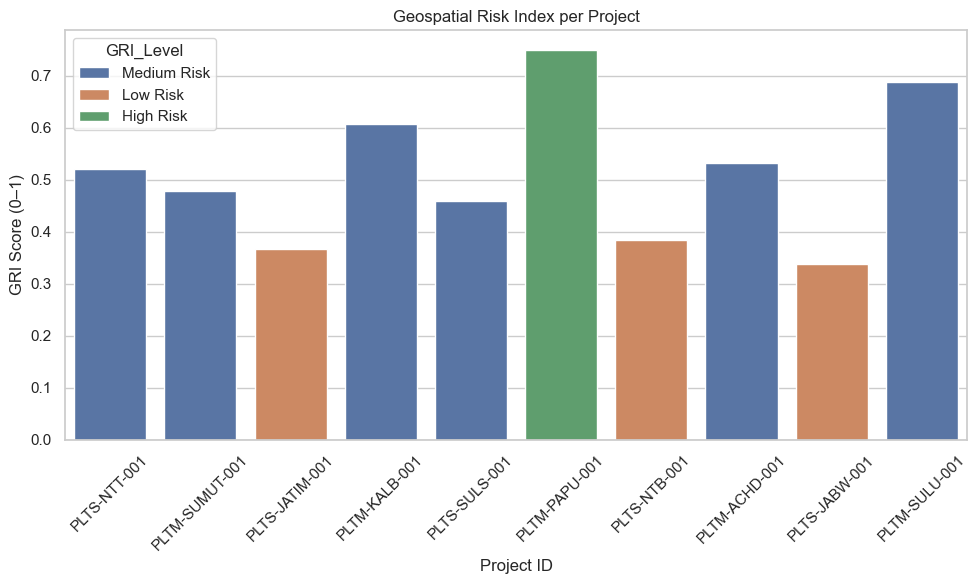

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==== 1. BACA DATA ====
path = "C:/Users/LENOVO/A10037DB2025/Green-Finance/Geospatial_Dataset.csv"
df = pd.read_csv(path, sep=";")

# ==== 2. BERSIHKAN DAN KONVERSI TIPE ====
for col in ['Solar_Irradiance', 'Water_Flow', 'Distance_to_Grid']:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

# ==== 3. NORMALISASI SKOR ====
df['Norm_Distance'] = df['Distance_to_Grid'] / df['Distance_to_Grid'].max()
df['Norm_SolarRisk'] = 1 - (df['Solar_Irradiance'] / df['Solar_Irradiance'].max())
df['Norm_WaterRisk'] = 1 - (df['Water_Flow'] / df['Water_Flow'].max())

# ==== 4. HITUNG GRI SCORE ====
w1, w2, w3 = 0.5, 0.25, 0.25
df['GRI_Score'] = (
    w1 * df['Norm_Distance'] +
    w2 * df['Norm_SolarRisk'] +
    w3 * df['Norm_WaterRisk']
)

# ==== 5. KATEGORI GRI ====
def classify_gri(score):
    if score >= 0.7:
        return "High Risk"
    elif score >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

df['GRI_Level'] = df['GRI_Score'].apply(classify_gri)

# ==== 6. TAMPILKAN KOLOM HASIL DI TERMINAL VSCode ====
print("\n📊 TABEL HASIL GRI:")
print(df[['Project_ID', 'GRI_Score', 'GRI_Level']])

# ==== 7. SIMPAN KE CSV ====
output_path = "C:/Users/LENOVO/A10037DB2025/Green-Finance/Hasil_GRI.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Hasil GRI disimpan ke: {output_path}")

# ==== 8. VISUALISASI ====
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Project_ID', y='GRI_Score', hue='GRI_Level', dodge=False)
plt.title('Geospatial Risk Index per Project')
plt.ylabel('GRI Score (0–1)')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
